In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import scipy
import os
import control

SAVE_PATH = 'report/figs/'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)
plt.rcParams['figure.figsize'] = [4, 4]

In [2]:

# var 17
A = np.array([[0, 1], [-1, 7]])
b_0 = 8
B = np.array([[0], [b_0]])
C = np.zeros(A.shape[0])
C[0] += 1
t_p = 0.45
sigma_bar = 0.15

g = lambda t: np.cos(t) + 3 * np.sin(2 * t) + 5

# Task 1

Мирошник, с 177

In [3]:
t_p_1 = 2.9
omega_0 = t_p_1 / t_p

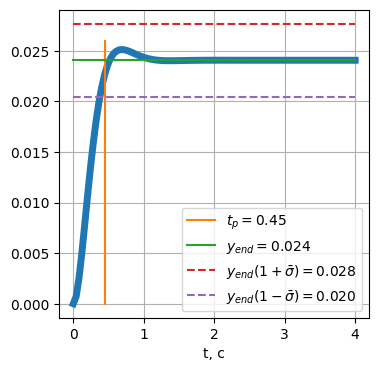

In [4]:
tf = scipy.signal.TransferFunction([1], [1, 1.41 * omega_0, omega_0**2]).to_ss()
ts = np.linspace(0, 4, 100)
t, y, _ = scipy.signal.lsim(tf, U = [1] * 100, T = ts )
end = y[-10:].mean()

plt.plot(t, y, linewidth=5)
plt.plot([t_p] * 100, np.linspace(0, 0.026, 100), label=f'$t_p = {t_p}$')
plt.plot(ts, [end.mean()] * 100, label=f'$y_{"{end}"} = {end: .3f}$')
plt.plot(ts, [end * (1 + sigma_bar)] * 100, label=f'$y_{"{end}"} (1 + \\bar \sigma) = {end * (1 + sigma_bar): .3f}$', linestyle='dashed')
plt.plot(ts, [end * (1 - sigma_bar)] * 100, label=f'$y_{"{end}"} (1 - \\bar \sigma) = {end * (1 - sigma_bar): .3f}$', linestyle='dashed')
plt.xlabel('t, c')

plt.legend()
plt.grid()
plt.savefig(SAVE_PATH + '1.png')

# Task 2

In [5]:
A_m, B_m, C_m, D_m = tf.to_ss().A, tf.to_ss().B, tf.to_ss().C, tf.to_ss().D
A_m, B_m, C_m, D_m = np.rot90(A_m, k=2), np.rot90(B_m, k=2), np.rot90(C_m, k=2), np.rot90(D_m, k=2)
A_m, A, B_m

(array([[  0.        ,   1.        ],
        [-41.5308642 ,  -9.08666667]]),
 array([[ 0,  1],
        [-1,  7]]),
 array([[0.],
        [1.]]))

In [6]:
theta = -((-A_m[-1, :] + A[-1, :]) / b_0).reshape(A.shape[0], 1)
kappa = b_0 / B_m[-1, 0] 
theta, kappa

(array([[-5.06635802],
        [-2.01083333]]),
 8.0)

In [7]:
def model(t, x, A, B, g):
    return A@x + (B * g(t)).reshape(A.shape[0])

t_span = [0, 20]
y0 = np.array([0, 0])
data_model= solve_ivp(model, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A_m, B_m, g))

In [8]:
def system(t, x, A, B, theta, kappa, g):
    u = theta.T @ x + 1 / kappa * g(t)
    return A@x + (B * u).reshape(A.shape[0])

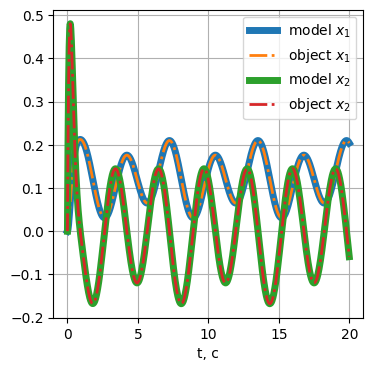

In [9]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A, B, theta, kappa, g))
plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')

plt.savefig(SAVE_PATH + '2_ideal_x.png')

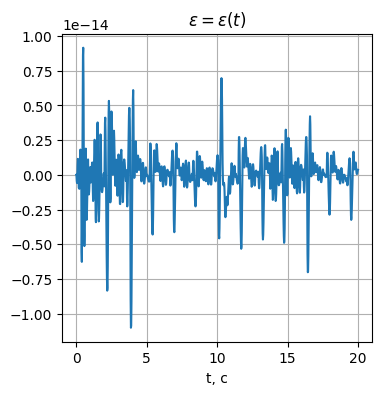

In [10]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_ideal_e.png')

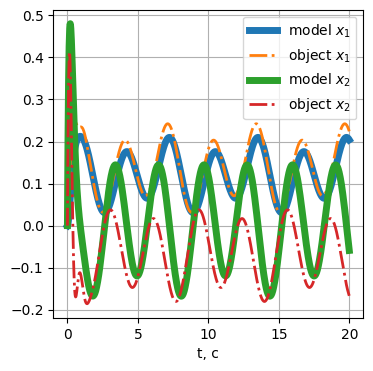

In [11]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A + 1, B, theta, kappa, g))

plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')


plt.savefig(SAVE_PATH + '2_not_ideal_1_x.png')

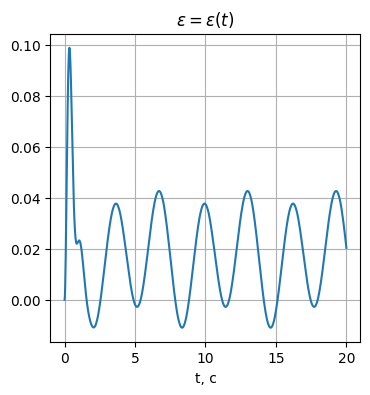

In [12]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_not_ideal_1_e.png')

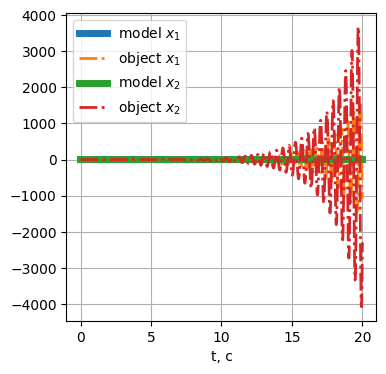

In [13]:
data = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A + 5, B, theta, kappa, g))

plt.plot(data.t, data_model.y[0, :], linewidth=5, label='model $x_1$')
plt.plot(data.t, data.y[0, :], '-.', linewidth=2, label='object $x_1$')
plt.plot(data.t, data_model.y[1, :], linewidth=5, label='model $x_2$')
plt.plot(data.t, data.y[1, :], '-.', linewidth=2, label='object $x_2$')
plt.grid()
plt.legend()
plt.xlabel('t, c')

plt.savefig(SAVE_PATH + '2_bad_5_x.png')

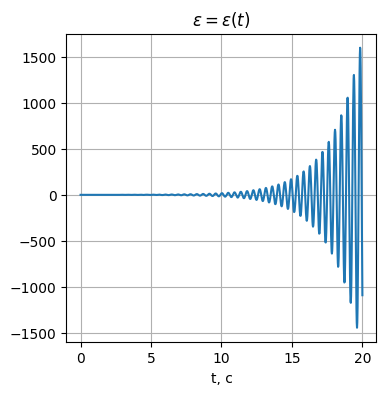

In [14]:
plt.plot(data.t, (C @ data.y).reshape(-1) - (C_m @ data_model.y).reshape(-1))
plt.grid()
plt.xlabel('t, c')
plt.title('$\epsilon = \epsilon(t)$')

plt.savefig(SAVE_PATH + '2_bad_5_e.png')

# Task 3

In [15]:
Q = np.diag([0.1, 0.2])
P = scipy.linalg.solve_sylvester(A_m.T, A_m, -Q)
P

array([[0.47349502, 0.00120392],
       [0.00120392, 0.01113763]])

In [16]:
def d_theta_hat(x, P, gamma, B, e):
    x = x.reshape(2, 1)
    e = e.reshape(2, 1)
    return (gamma * x @ B.T @ P @ e).reshape(-1)

def system(t, x, A, B, A_m, B_m, kappa, g, gamma):
    theta_hat = x[-2:]
    x_m = x[:2]
    x = x[2:4]
    e = x_m - x
    u = theta_hat.T @ x + 1 / kappa * g(t)
    return np.hstack([model(t, x_m, A_m, B_m, g),
                        A@x + (B * u).reshape(A.shape[0]),
                        d_theta_hat(x, P, gamma, B, e)])

## exp 1

In [17]:
experiment_1 = {}
gamma = 1000
y0 = [0, 0, 0, 0, 0, 0]
t_span = [0, 300]

for bias in [0, 1, 5]:
    tmpA = A.copy()
    tmpA[-1] += bias
    experiment_1[bias] = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(tmpA, B, A_m, B_m, kappa, g, gamma))

In [18]:
for bias in experiment_1:
    t = experiment_1[bias].t
    state =  experiment_1[bias].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,], linewidth=2, label='model $x_1$')
    plt.plot(t, x[0,], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t, x_m[1,], linewidth=2, label='model $x_2$')
    plt.plot(t, x[1,], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_x.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:], linewidth=2, label='model $x_1$')
    plt.plot(t[-100:], x[0,][-100:], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:], linewidth=2, label='model $x_2$')
    plt.plot(t[-100:], x[1,][-100:], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_x_small.png')
    plt.cla()
    plt.close()

In [19]:
for bias in experiment_1:
    t = experiment_1[bias].t
    state =  experiment_1[bias].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,] - x[0,], linewidth=5, label='model $x_1$')
    plt.plot(t, x_m[1,] - x[1,], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_e.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:] - x[0,][-100:], linewidth=5, label='e $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:] - x[1,][-100:], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_e_small.png')
    plt.cla()
    plt.close()

In [20]:
for bias in experiment_1:
    tmpA = A.copy()
    tmpA[-1] += bias
    theta =  -((-A_m[-1, :] + tmpA[-1, :]) / b_0).reshape(A.shape[0], 1)
    t = experiment_1[bias].t
    state =  experiment_1[bias].y
    theta_tilda = theta - state[-2:]
    
    plt.plot(t, theta_tilda[0,], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t, theta_tilda[1,], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_theta.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], theta_tilda[0][-100:], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t[-100:], theta_tilda[1][-100:], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_1_{bias}_theta_small.png')
    plt.cla()
    plt.close()

## exp 2

In [26]:
experiment_2 = {}
y0 = [0, 0, 0, 0, 0, 0]
t_span = [0, 80]
for gamma in [1e-4, 1, 20]:
    experiment_2[gamma] = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(A, B, A_m, B_m, kappa, g, gamma))

In [30]:
for gamma in experiment_2:
    t = experiment_2[gamma].t
    state =  experiment_2[gamma].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,], linewidth=2, label='model $x_1$')
    plt.plot(t, x[0,], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t, x_m[1,], linewidth=2, label='model $x_2$')
    plt.plot(t, x[1,], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_x.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:], linewidth=2, label='model $x_1$')
    plt.plot(t[-100:], x[0,][-100:], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:], linewidth=2, label='model $x_2$')
    plt.plot(t[-100:], x[1,][-100:], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_x_small.png')
    plt.cla()
    plt.close()

In [31]:
for gamma in experiment_2:
    t = experiment_2[gamma].t
    state =  experiment_2[gamma].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,] - x[0,], linewidth=5, label='model $x_1$')
    plt.plot(t, x_m[1,] - x[1,], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_e.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:] - x[0,][-100:], linewidth=5, label='e $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:] - x[1,][-100:], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_e_small.png')
    plt.cla()
    plt.close()

In [32]:
for gamma in experiment_2:
    tmpA = A.copy()
    theta =  -((-A_m[-1, :] + tmpA[-1, :]) / b_0).reshape(A.shape[0], 1)
    t = experiment_2[gamma].t
    state =  experiment_2[gamma].y
    theta_tilda = theta - state[-2:]
    
    plt.plot(t, theta_tilda[0,], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t, theta_tilda[1,], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_theta.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], theta_tilda[0,][-100:], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t[-100:], theta_tilda[1,][-100:], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_2_{gamma}_theta_small.png')
    plt.cla()
    plt.close()

## Exp 3

In [33]:
experiment_3 = {}
gamma = 1000
y0 = [0, 0, 0, 0, 0, 0]
t_span = [0, 300]
g = lambda t: 0 * t + 1

for bias in [0, 1, 5]:
    tmpA = A.copy()
    tmpA[-1] += bias
    experiment_3[bias] = solve_ivp(system, t_span=t_span, t_eval=np.linspace(*t_span, 1000), y0=y0, args=(tmpA, B, A_m, B_m, kappa, g, gamma))
for bias in experiment_3:
    t = experiment_3[bias].t
    state =  experiment_3[bias].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,], linewidth=2, label='model $x_1$')
    plt.plot(t, x[0,], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t, x_m[1,], linewidth=2, label='model $x_2$')
    plt.plot(t, x[1,], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_x.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:], linewidth=2, label='model $x_1$')
    plt.plot(t[-100:], x[0,][-100:], '-.', linewidth=1, label='object $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:], linewidth=2, label='model $x_2$')
    plt.plot(t[-100:], x[1,][-100:], '-.', linewidth=1, label='object $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$x = x(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_x_small.png')
    plt.cla()
    plt.close()
for bias in experiment_3:
    t = experiment_3[bias].t
    state =  experiment_3[bias].y
    x_m = state[:2]
    x = state[2:4]
    plt.plot(t, x_m[0,] - x[0,], linewidth=5, label='model $x_1$')
    plt.plot(t, x_m[1,] - x[1,], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_e.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], x_m[0,][-100:] - x[0,][-100:], linewidth=5, label='e $x_1$')
    plt.plot(t[-100:], x_m[1,][-100:] - x[1,][-100:], linewidth=5, label='model $x_2$')
    plt.grid()
    plt.legend()
    plt.title('$e = e(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_e_small.png')
    plt.cla()
    plt.close()
for bias in experiment_3:
    tmpA = A.copy()
    tmpA[-1] += bias
    theta =  -((-A_m[-1, :] + tmpA[-1, :]) / b_0).reshape(A.shape[0], 1)
    t = experiment_3[bias].t
    state =  experiment_3[bias].y
    theta_tilda = theta - state[-2:]
    
    plt.plot(t, theta_tilda[0,], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t, theta_tilda[1,], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_theta.png')
    plt.cla()
    plt.close()
    
    plt.plot(t[-100:], theta_tilda[0][-100:], linewidth=5, label='$\\tilde{\\theta}_1$')
    plt.plot(t[-100:], theta_tilda[1][-100:], linewidth=5, label='$\\tilde{\\theta}_2$')
    plt.grid()
    plt.legend()
    plt.title('$\\tilde \\theta = \\tilde \\theta(t)$')
    plt.savefig(SAVE_PATH + f'3_3_{bias}_theta_small.png')
    plt.cla()
    plt.close()
